<a href="https://colab.research.google.com/github/Rafael-Muthemba/Phase4project/blob/main/Phase4Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install --upgrade wordcloud

# Data Understanding

In [3]:
#importing relevant libraries
#standard libraries
import pandas as pd
import numpy as np


#visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from wordcloud import WordCloud
%matplotlib inline



In [4]:
# load data
mov_df = pd.read_csv('movies.csv')
mov_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
mov_df.shape

(9742, 3)

In [6]:
# ratings dataframe
ratings_df = pd.read_csv('ratings.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


For ease of understanding and cleaning, we will merge the movie dataset and the ratings dataset. This will result to a dataset with both the movie name and its rating.

In [7]:
#Merging movie dataFrame with ratings DataFrame
mov_df= pd.merge(mov_df, ratings_df, on='movieId')
mov_df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


  Since Timestamp is irrelevant for our analysis we will drop the column

In [8]:
#Dropping Timestamp column a
mov_df.drop(['timestamp'], axis=1, inplace=True)

In [9]:
mov_df.head(2)

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0


In [10]:
mov_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  100836 non-null  int64  
 1   title    100836 non-null  object 
 2   genres   100836 non-null  object 
 3   userId   100836 non-null  int64  
 4   rating   100836 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ MB


We can now see that we have one harmonised dataframe that has all columns we may want to use for our analysis




In [11]:
#Checking null count
mov_df.isna().sum()

movieId    0
title      0
genres     0
userId     0
rating     0
dtype: int64

In [12]:
#Checking for duplicates
mov_df.duplicated().sum()

0

Great so we find that we have no missing values and any duplicates.

# Exploratory Data Analysis

In [13]:
# EDA: Movie Genres Distribution
genre_counts = mov_df['genres'].str.split('|', expand=True).stack().value_counts()
genre_fig = px.bar(genre_counts, x=genre_counts.index, y=genre_counts.values,
                   labels={'x': 'Genres', 'y': 'Count'}, title='Distribution of Movie Genres')

genre_fig.show()

We can see that the highest number of movies are in the drama genre while the genre with the least is film-Noir.  

In [14]:
# EDA: Rating Distribution
rating_hist = px.histogram(ratings_df, x='rating', title='Distribution of Ratings')
rating_hist.update_xaxes(title_text='Rating')
rating_hist.update_yaxes(title_text='Count')

rating_hist.show()

Highest rating is 4 while lowest is 0.5

In [15]:
mov_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  100836 non-null  int64  
 1   title    100836 non-null  object 
 2   genres   100836 non-null  object 
 3   userId   100836 non-null  int64  
 4   rating   100836 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.6+ MB


Let's now find out the top 5 movies and the bottom 5 movies based on ratings

In [16]:
# The average rating for each movie
average_ratings = mov_df.groupby('title')['rating'].mean().reset_index()

# Sorting movies by average rating in ascending order to get the bottom 5
bottom_5_movies = average_ratings.sort_values('rating').head(5)

# Creating interactive bar charts for bottom 5 movies
bottom_5_fig = px.bar(bottom_5_movies, x='rating', y='title', orientation='h',
                      labels={'x': 'Average Rating', 'y': 'Movie Title'},
                      title='Bottom 5 Movies by Average Rating')
# Showing the interactive plots
bottom_5_fig.show()



All of these movies have a rating of 0.5

In [17]:
# Sorting movies by average rating in ascending order to get the bottom 5
top_5_movies = average_ratings.sort_values('rating').tail(5)

# Creating interactive bar charts for bottom 5 movies
top_5_fig = px.bar(top_5_movies, x='rating', y='title', orientation='h',
                      labels={'x': 'Average Rating', 'y': 'Movie Title'},
                      title='Top 5 Movies by Average Rating')
# Showing the interactive plots
top_5_fig.show()

All these movies have a rating of 5, which is the highest rating.

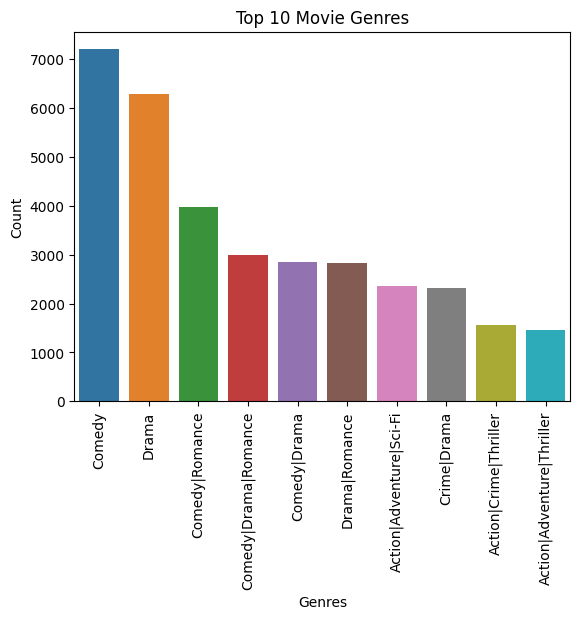

In [18]:

# Bar chart for top genres
genres_counts = mov_df['genres'].value_counts().head(10)
sns.barplot(x=genres_counts.index, y=genres_counts.values)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Top 10 Movie Genres')
plt.xticks(rotation=90)
plt.show()